In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import MinMaxScaler

import tensorflow as tf

from tensorflow.keras.models import Sequential

from tensorflow.keras.layers import Input, Dense

In [2]:
housing_data = pd.read_csv('sample_data/california_housing_train.csv')

In [3]:
housing_data.describe().T

,count,mean,std,min,25%,50%,75%,max
longitude,17000.0,-119.562108,2.005166,-124.3500,-121.790000,-118.4900,-118.000,-114.3100
latitude,17000.0,35.625225,2.137340,32.5400,33.930000,34.2500,37.720,41.9500
housing_median_age,17000.0,28.589353,12.586937,1.0000,18.000000,29.0000,37.000,52.0000
total_rooms,17000.0,2643.664412,2179.947071,2.0000,1462.000000,2127.0000,3151.250,37937.0000
total_bedrooms,17000.0,539.410824,421.499452,1.0000,297.000000,434.0000,648.250,6445.0000
population,17000.0,1429.573941,1147.852959,3.0000,790.000000,1167.0000,1721.000,35682.0000
households,17000.0,501.221941,384.520841,1.0000,282.000000,409.0000,605.250,6082.0000
median_income,17000.0,3.883578,1.908157,0.4999,2.566375,3.5446,4.767,15.0001
median_house_value,17000.0,207300.912353,115983.764387,14999.0000,119400.000000,180400.0000,265000.000,500001.0000


In [4]:
housing_data.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value'],
      dtype='object')

In [5]:
housing_data.dtypes

longitude             float64
latitude              float64
housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
population            float64
households            float64
median_income         float64
median_house_value    float64
dtype: object

In [110]:
X = housing_data.drop(columns= ['median_house_value'])
y = housing_data.median_house_value

In [111]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 5000)

In [112]:
# Separating validation data
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 2000)

In [113]:
len(X_train), len(X_val), len(X_test)

(10000, 2000, 5000)

In [114]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

In [115]:
X_train.max(axis = 0), X_train.min(axis = 0), X_val.max(axis=0)

(array([1., 1., 1., 1., 1., 1., 1., 1.]),
 array([0., 0., 0., 0., 0., 0., 0., 0.]),
 array([0.97310757, 0.99255319, 1.        , 0.84898084, 0.69149597,
        0.42136831, 0.69116922, 1.        ]))

In [116]:
num_columns = X_train.shape[1]
num_outputs = 1

In [123]:
tf.keras.backend.clear_session()

In [124]:
model = Sequential([
    Input(num_columns),
    Dense(32, activation = 'relu', kernel_regularizer = tf.keras.regularizers.L1L2(l1 = 0.005, l2 = 0.5)),
    Dense(64, activation = 'relu', kernel_regularizer = tf.keras.regularizers.L1L2(l1 = 0.005, l2 = 0.5)),
    Dense(32, activation = 'relu', kernel_regularizer = tf.keras.regularizers.L1L2(l1 = 0.005, l2 = 0.5)),
    Dense(num_outputs, activation = None),
])

In [125]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                288       
                                                                 
 dense_1 (Dense)             (None, 64)                2112      
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 1)                 33        
                                                                 
Total params: 4513 (17.63 KB)
Trainable params: 4513 (17.63 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [126]:
model.compile(loss = 'mse')

In [127]:
history = model.fit(X_train, y_train, epochs = 10, validation_data = (X_val, y_val))

Epoch 1/10
313/313 [==============================] - 1s 3ms/step - loss: 56337977344.0000 - val_loss: 57214468096.0000
Epoch 2/10
313/313 [==============================] - 1s 2ms/step - loss: 54106865664.0000 - val_loss: 52141109248.0000
Epoch 3/10
313/313 [==============================] - 1s 2ms/step - loss: 44217950208.0000 - val_loss: 36246228992.0000
Epoch 4/10
313/313 [==============================] - 1s 2ms/step - loss: 24306098176.0000 - val_loss: 14900816896.0000
Epoch 5/10
313/313 [==============================] - 1s 2ms/step - loss: 12546385920.0000 - val_loss: 12179244032.0000
Epoch 6/10
313/313 [==============================] - 1s 3ms/step - loss: 11901599744.0000 - val_loss: 11872202752.0000
Epoch 7/10
313/313 [==============================] - 1s 3ms/step - loss: 11551785984.0000 - val_loss: 11524467712.0000
Epoch 8/10
313/313 [==============================] - 1s 2ms/step - loss: 11195384832.0000 - val_loss: 11187067904.0000
Epoch 9/10
313/313 [====================

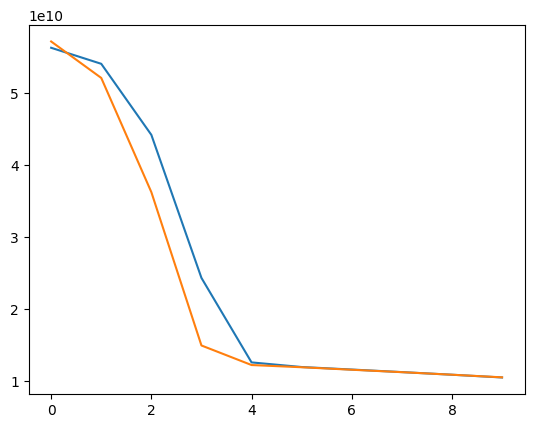

In [128]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()

In [19]:
model.predict(X_train)

399/399 [==============================] - 1s 2ms/step


array([[105794.41],
       [154821.77],
       [289394.56],
       ...,
       [205177.5 ],
       [166493.6 ],
       [213424.05]], dtype=float32)

In [101]:
model.evaluate(X_train, y_train)

313/313 [==============================] - 0s 1ms/step - loss: 10273605632.0000


10273605632.0

In [102]:
model.evaluate(X_test, y_test)

157/157 [==============================] - 0s 1ms/step - loss: 10354006016.0000


10354006016.0

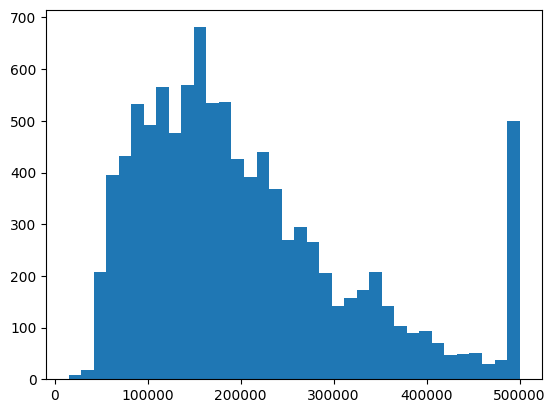

In [103]:
plt.hist(y_train, bins = 'fd')
plt.show()